In [1]:
import numpy as np
import matplotlib.pyplot as plt

def bond_price_pv(cash_flows, discount_rate):
    "Cash Flows method."
    return np.sum(cash_flows / (1 + discount_rate) ** np.arange(1, len(cash_flows) + 1))

def bond_price_ytm(par_value, coupon_rate, periods, yield_to_maturity):
    "Yield to Maturity method."
    coupon_payment = par_value * coupon_rate
    cash_flows = np.full(periods, coupon_payment)
    cash_flows[-1] += par_value  # Add face value at maturity
    return bond_price_pv(cash_flows, yield_to_maturity)

def bond_price_duration(par_value, coupon_rate, periods, discount_rate):
    "Macaulay Duration method."
    cash_flows = np.full(periods, par_value * coupon_rate)
    cash_flows[-1] += par_value  # Add face value at maturity
    durations = np.arange(1, len(cash_flows) + 1)
    macaulay_duration = np.sum(durations * cash_flows) / np.sum(cash_flows)
    return par_value / (1 + discount_rate) ** macaulay_duration

def calculate_mse(actual_prices, estimated_prices):
    "Calculate Mean Squared Error (MSE)."
    return np.mean((actual_prices - estimated_prices) ** 2)

par_value = 100  # Par value of the bond
coupon_rate = 0.05  # Annual coupon rate of 5%
periods = 10  # Number of periods to maturity
yield_to_maturity = 0.04  # Yield to maturity of 4%
discount_rate = 0.03  # Discount rate for Macaulay Duration method

# Actual bond prices (for example, obtained from market data)
actual_prices = np.random.uniform(95, 105, size=100)

# Calculate bond prices using three methods
estimated_prices_pv = np.array([bond_price_pv(np.full(periods, par_value * coupon_rate) + [par_value], discount_rate) for _ in range(100)])
estimated_prices_ytm = np.array([bond_price_ytm(par_value, coupon_rate, periods, yield_to_maturity) for _ in range(100)])
estimated_prices_duration = np.array([bond_price_duration(par_value, coupon_rate, periods, discount_rate) for _ in range(100)])

# Calculate MSE for each method
mse_pv = calculate_mse(actual_prices, estimated_prices_pv)
mse_ytm = calculate_mse(actual_prices, estimated_prices_ytm)
mse_duration = calculate_mse(actual_prices, estimated_prices_duration)

# Display the MSE results
print(f"MSE (Present Value of Cash Flows): {mse_pv:.2f}")
print(f"MSE (Yield to Maturity): {mse_ytm:.2f}")
print(f"MSE (Macaulay Duration): {mse_duration:.2f}")



MSE (Present Value of Cash Flows): 633173.91
MSE (Yield to Maturity): 73.81
MSE (Macaulay Duration): 498.82


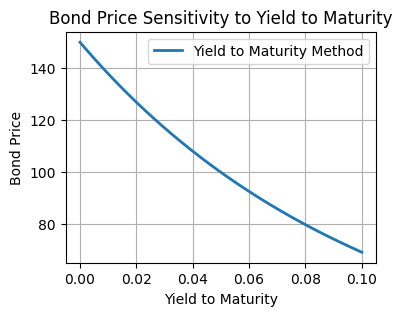

In [2]:
# Plot the bond price sensitivity to changes in yield to maturity
ytm_values = np.linspace(0, 0.1, 100)
prices_ytm_sensitivity = [bond_price_ytm(par_value, coupon_rate, periods, ytm) for ytm in ytm_values]

plt.figure(figsize=(4, 3))
plt.plot(ytm_values, prices_ytm_sensitivity, label='Yield to Maturity Method', linewidth=2)
plt.title('Bond Price Sensitivity to Yield to Maturity')
plt.xlabel('Yield to Maturity')
plt.ylabel('Bond Price')
plt.legend()
plt.grid(True)
plt.show()
